In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import urllib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import mysql.connector as connection


In [3]:
download_dir = "./data/"
os.makedirs(download_dir , exist_ok=True)
download_url = "https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"
filename = os.path.basename(download_url)
print(filename)

download_file_path = os.path.join(download_dir,filename)
print(download_file_path)

urllib.request.urlretrieve(download_url,download_file_path)


cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x2b9716b4100>)

In [4]:
df=pd.read_csv(r"./data/cars_dataset.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [6]:
try:
    conn = connection.connect(user='root',password='696969')
except Exception as e:
    print(e)
else:
    print('connected')
    print('database connected succesfully')
finally:
    conn.close()


connected
database connected succesfully


In [7]:
try:
    conn = connection.connect(user='root', password='696969')
    query="create database if not exists car_database;"
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print('connected')
    print("database created successfully")
finally:
    conn.close()
try:
    conn = connection.connect(user='root', password='696969', database="car_database")
    query="""create table if not exists car_dataset(
car_name varchar(30),
brand varchar(30),
model varchar(30),
vehicle_age int,
km_driven int,
seller_type varchar(30),
fuel_type varchar(30),
transmission_type varchar(30),
mileage float,
engine int,
max_power float,
seats int,
selling_price bigint);"""

    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print('connected')
    print("table created successfully")
finally:
    conn.close()

connected
database created successfully
connected
table created successfully


In [8]:
try:
    conn = connection.connect(user='root', password='696969', database="car_database")
    query="""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()

    query = f"""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)        
    conn.commit()
    for key, value in df.iterrows():
        car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price = value[0],value[1], value[2], value[3], value[4],value[5] ,value[6],value[7] ,value[8] ,value[9] ,value[10] ,value[11] ,value[12] 
        
        query = f"""insert into car_dataset values ('{car_name}','{brand}', '{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"""
        cursor = conn.cursor()
        cursor.execute(query)
    conn.commit()

except Exception as e:
    print(e)
else:
    print('connected')
    print("table created successfully")
finally:
    conn.close()

connected
table created successfully


In [9]:
pd.Categorical(df['car_name'])

['Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', ..., 'Bentley Continental', 'Rolls-Royce Ghost', 'Bentley Continental', 'Ferrari GTC4Lusso', 'Bentley Continental']
Length: 15411
Categories (121, object): ['Audi A4', 'Audi A6', 'Audi A8', 'Audi Q7', ..., 'Volvo S90', 'Volvo XC', 'Volvo XC60', 'Volvo XC90']

In [10]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


# observations=>
- hyundai i20=> 906

EDA

In [11]:
# split numerical and categorical features

numerical_features =[feature for feature in df.columns if df[feature].dtype !='0']
categorical_features = [feature for feature in df.columns if df[feature].dtype !='0']
print(f"there are{len(numerical_features)}numerical features named:{numerical_features}")
print(f"there are{len(categorical_features)}categorical features named:{categorical_features}")

there are13numerical features named:['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
there are13categorical features named:['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [12]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [13]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.6,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000
15410,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.5,5998,626.0,4,14500000


In [14]:
df.shape

(15411, 13)

In [15]:
pd.Categorical(df['car_name'])

['Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', ..., 'Bentley Continental', 'Rolls-Royce Ghost', 'Bentley Continental', 'Ferrari GTC4Lusso', 'Bentley Continental']
Length: 15411
Categories (121, object): ['Audi A4', 'Audi A6', 'Audi A8', 'Audi Q7', ..., 'Volvo S90', 'Volvo XC', 'Volvo XC60', 'Volvo XC90']

In [16]:
df.isnull().mean()

car_name             0.0
brand                0.0
model                0.0
vehicle_age          0.0
km_driven            0.0
seller_type          0.0
fuel_type            0.0
transmission_type    0.0
mileage              0.0
engine               0.0
max_power            0.0
seats                0.0
selling_price        0.0
dtype: float64

In [17]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True))



car_name
Hyundai i20           0.058789
Maruti Swift Dzire    0.057751
Maruti Swift          0.050678
Maruti Alto           0.050483
Honda City            0.049121
                        ...   
Maserati Ghibli       0.000065
Hyundai Aura          0.000065
Force Gurkha          0.000065
Isuzu MUX             0.000065
Ferrari GTC4Lusso     0.000065
Name: proportion, Length: 121, dtype: float64
brand
Maruti           0.323924
Hyundai          0.193498
Honda            0.096360
Mahindra         0.065602
Toyota           0.051457
Ford             0.051262
Volkswagen       0.040231
Renault          0.034780
BMW              0.028486
Tata             0.027902
Mercedes-Benz    0.021867
Skoda            0.021673
Audi             0.012459
Datsun           0.011031
Jaguar           0.003828
Land Rover       0.003309
Jeep             0.002660
Kia              0.002076
Porsche          0.001363
Volvo            0.001298
MG               0.001233
Mini             0.001103
Nissan           0.000714


univariant Analysis =>

- the main purpose of univariant is to understand the distribution of a single variable/feature

In [18]:
df["car_name"].dtype

dtype('O')

In [19]:
df["max_power"].dtype

dtype('float64')

In [20]:
df["car_name"].dtype == 'O'

True

In [21]:
df["car_name"].dtype != 'O'

False

In [22]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [23]:
# propotion of each unique value in categorical variable

for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())
    print()
    print("-----------------------------------------------------")
    print()

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [25]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [26]:
for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())
    print()
    print("-----------------------------------------------------")
    print()

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

Numerical Features



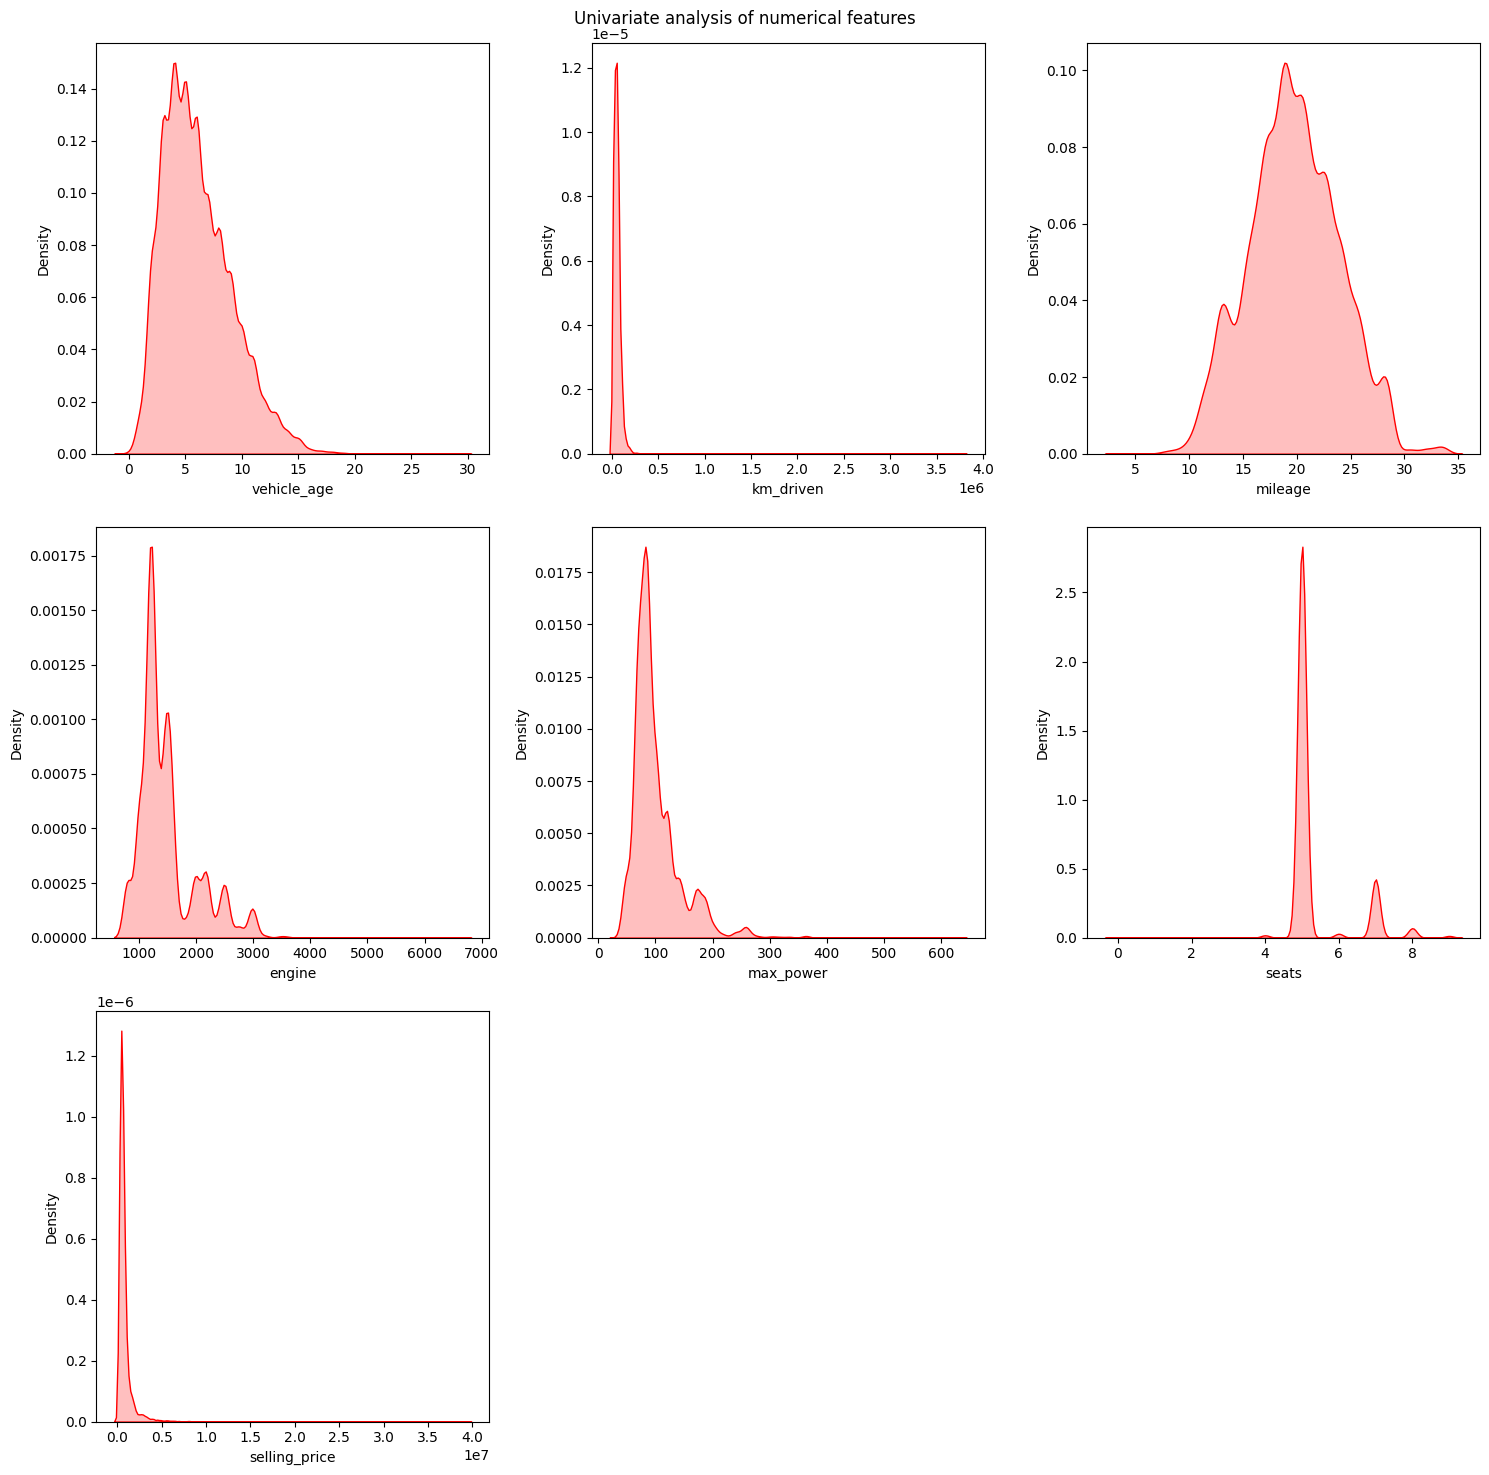

In [27]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x= df[numeric_features[i]], color='r', shade =True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

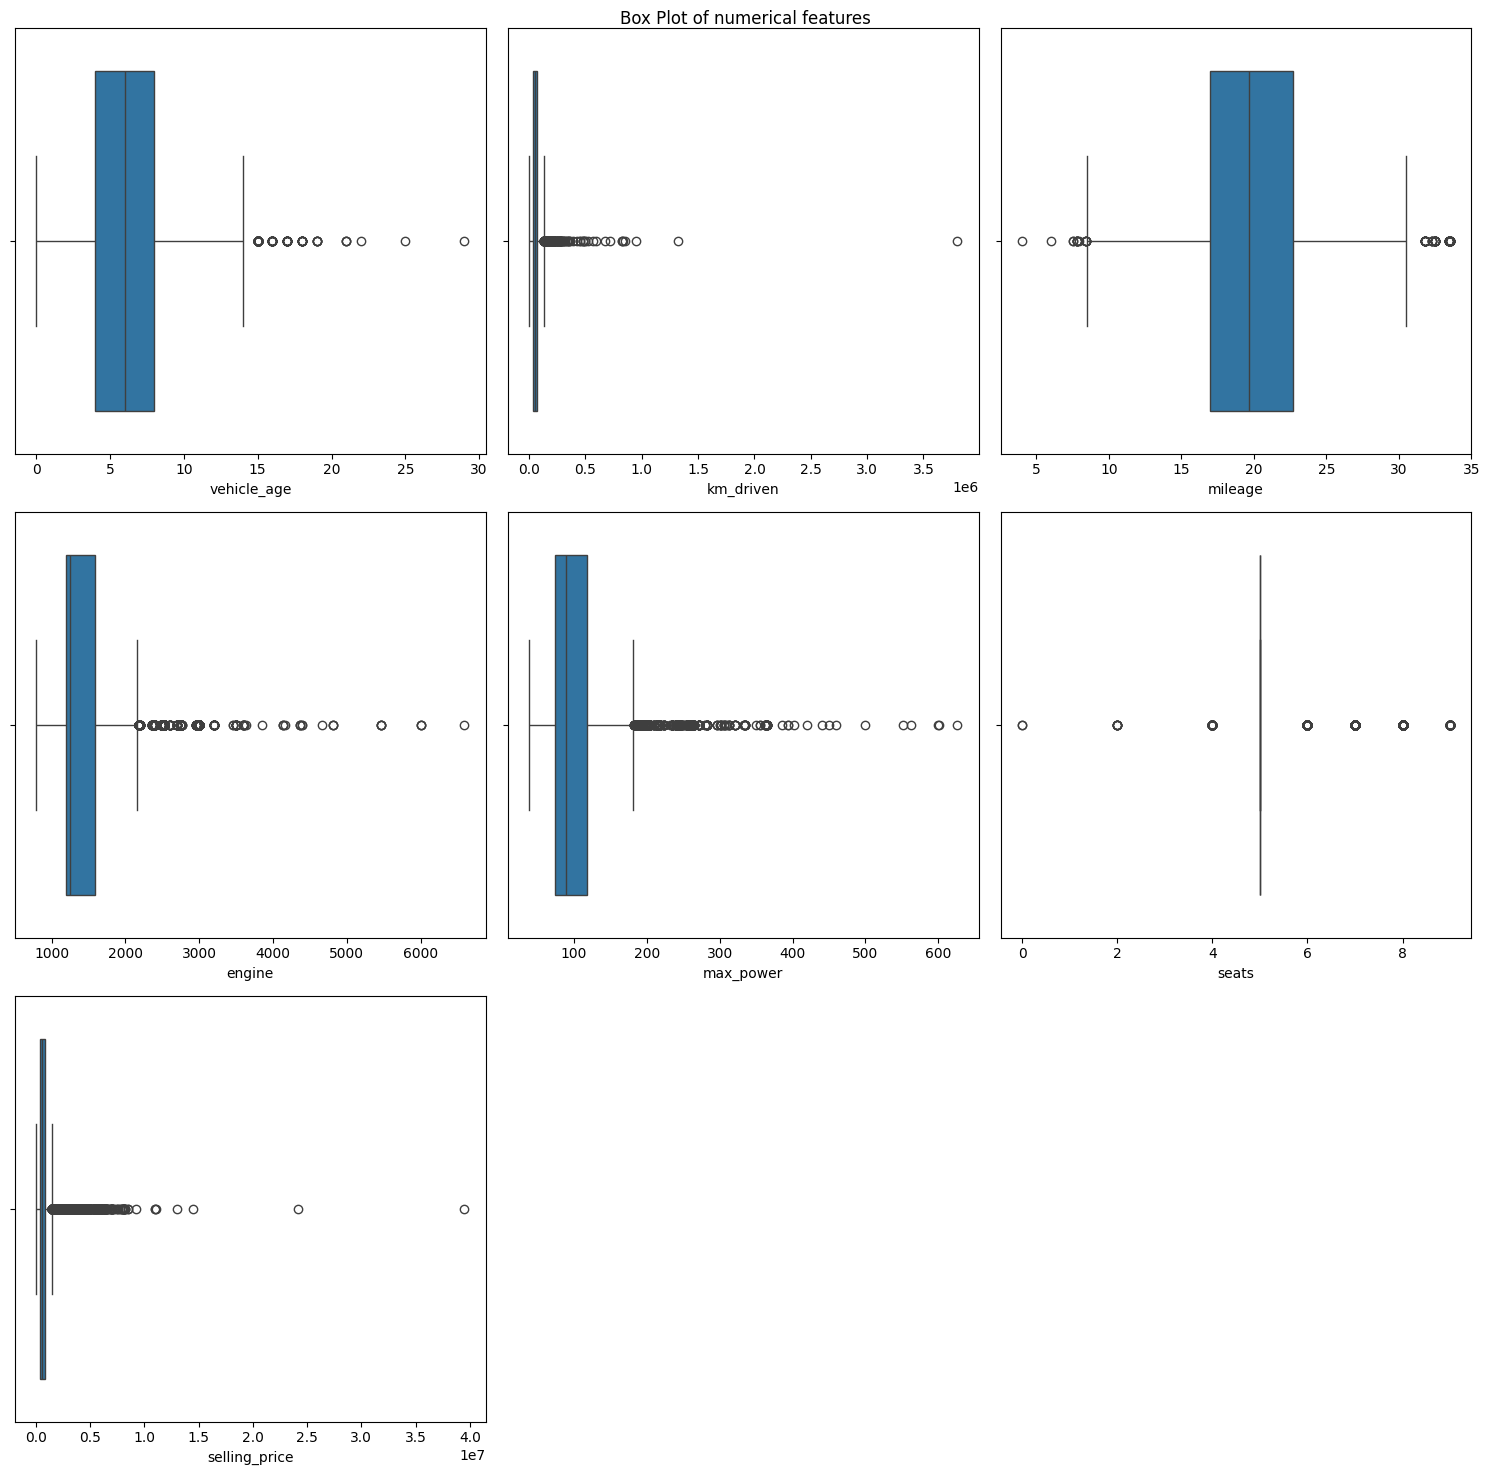

In [28]:

plt.figure(figsize=(15,15))

plt.suptitle("Box Plot of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [29]:
df[categorical_features]

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
1,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
2,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
3,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
4,Maruti Alto,Maruti,Alto,Individual,CNG,Manual
...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,Individual,Petrol,Automatic
15408,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,Dealer,Petrol,Automatic


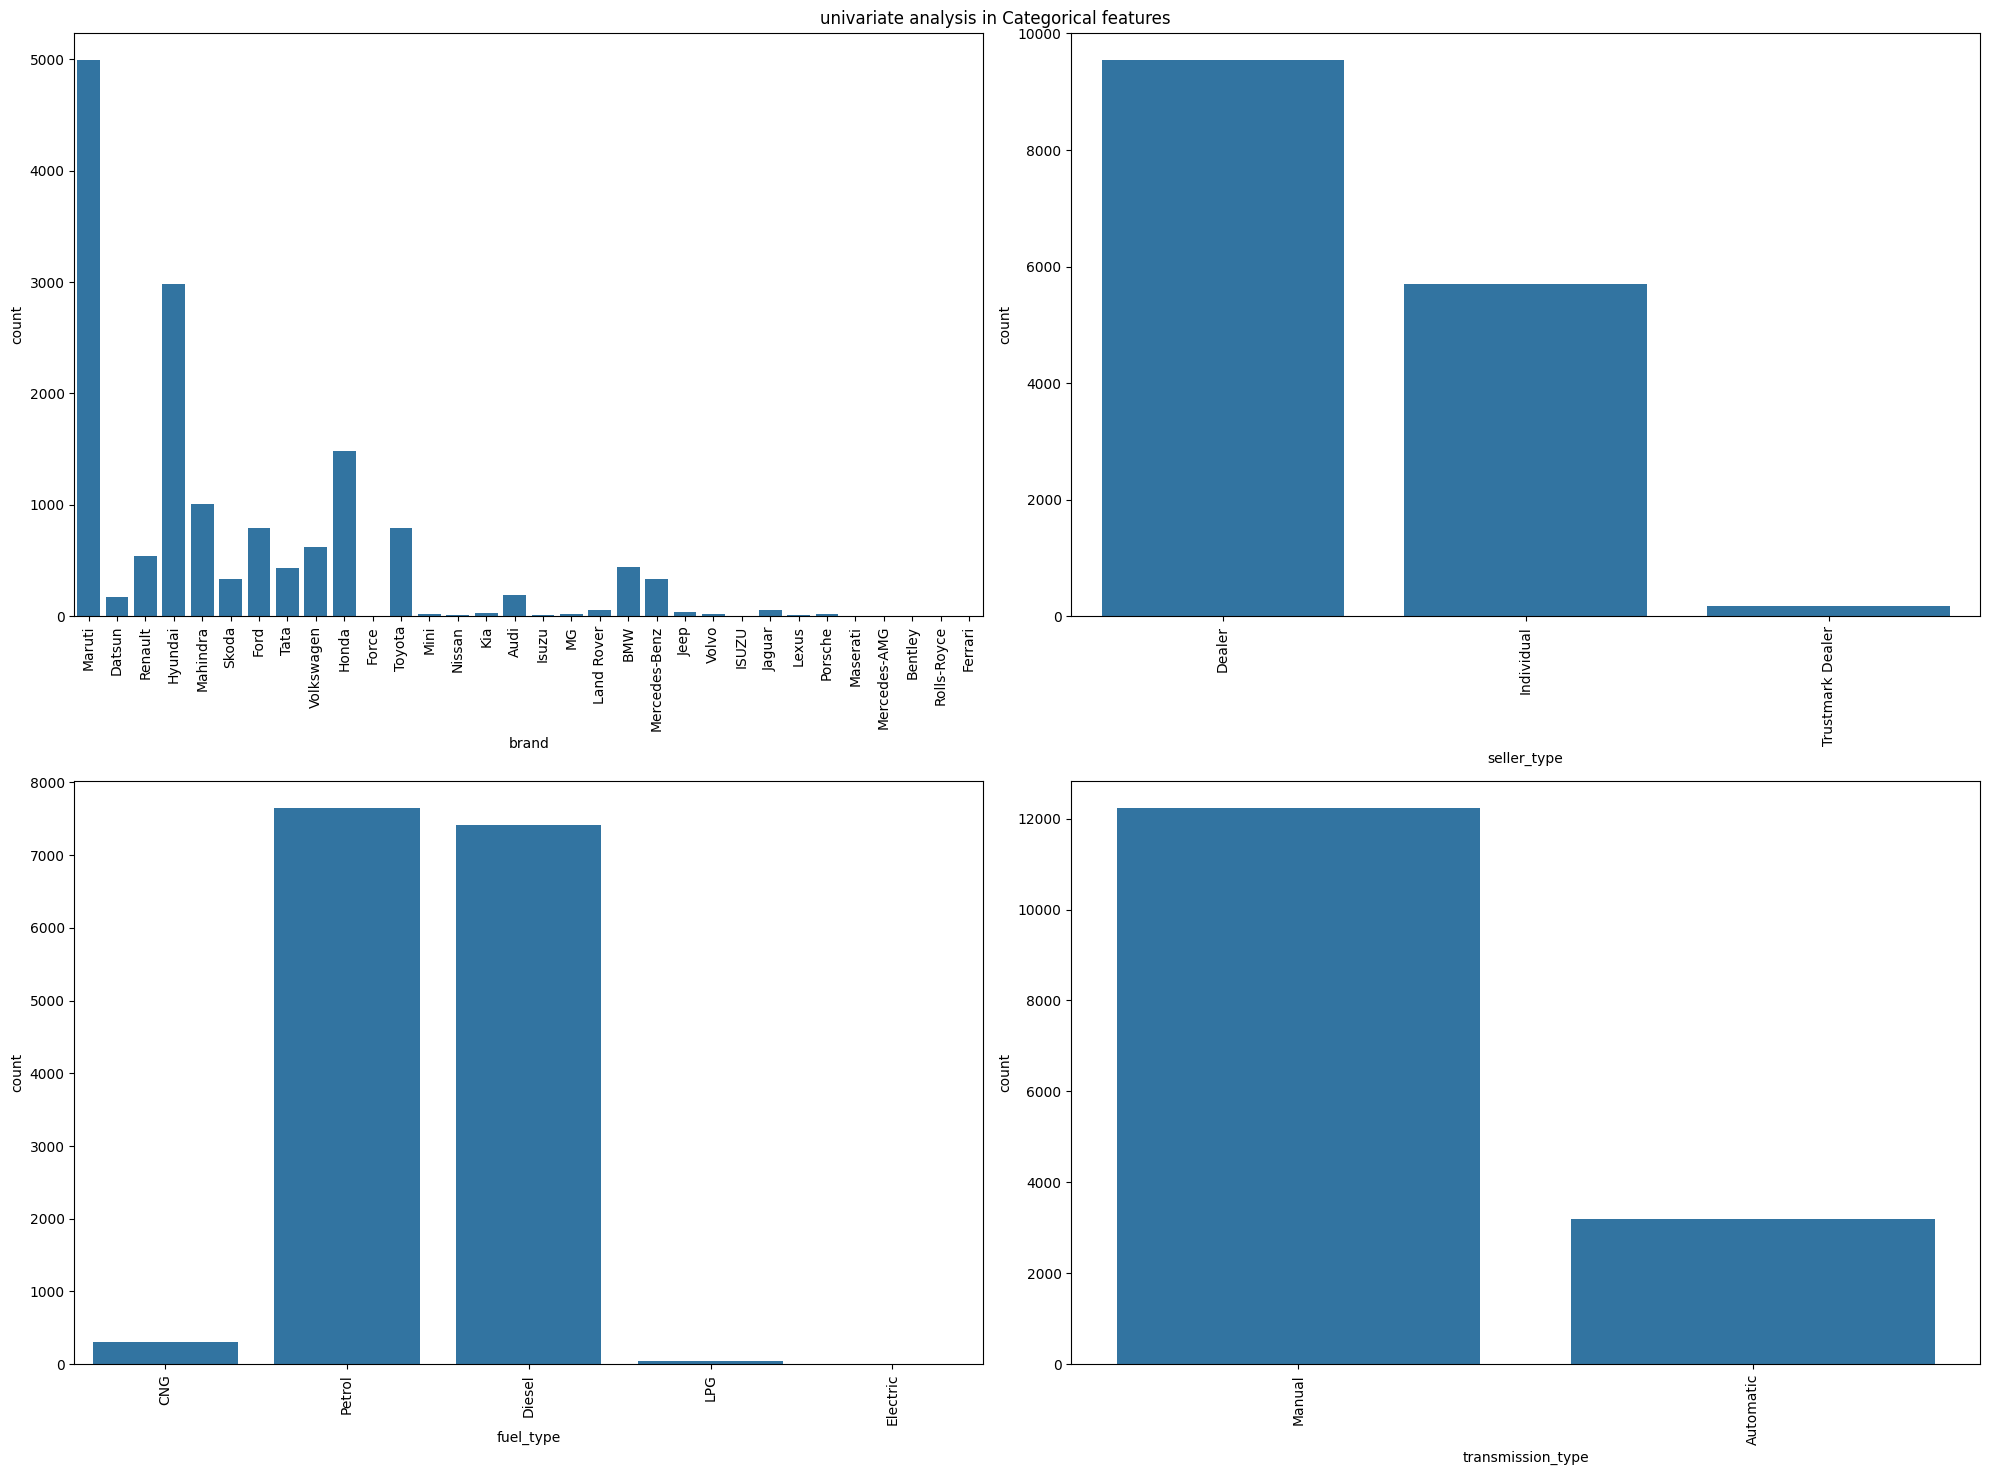

In [30]:
plt.figure(figsize= (20,15))
plt.suptitle("univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)) :
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()


In [31]:
df[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


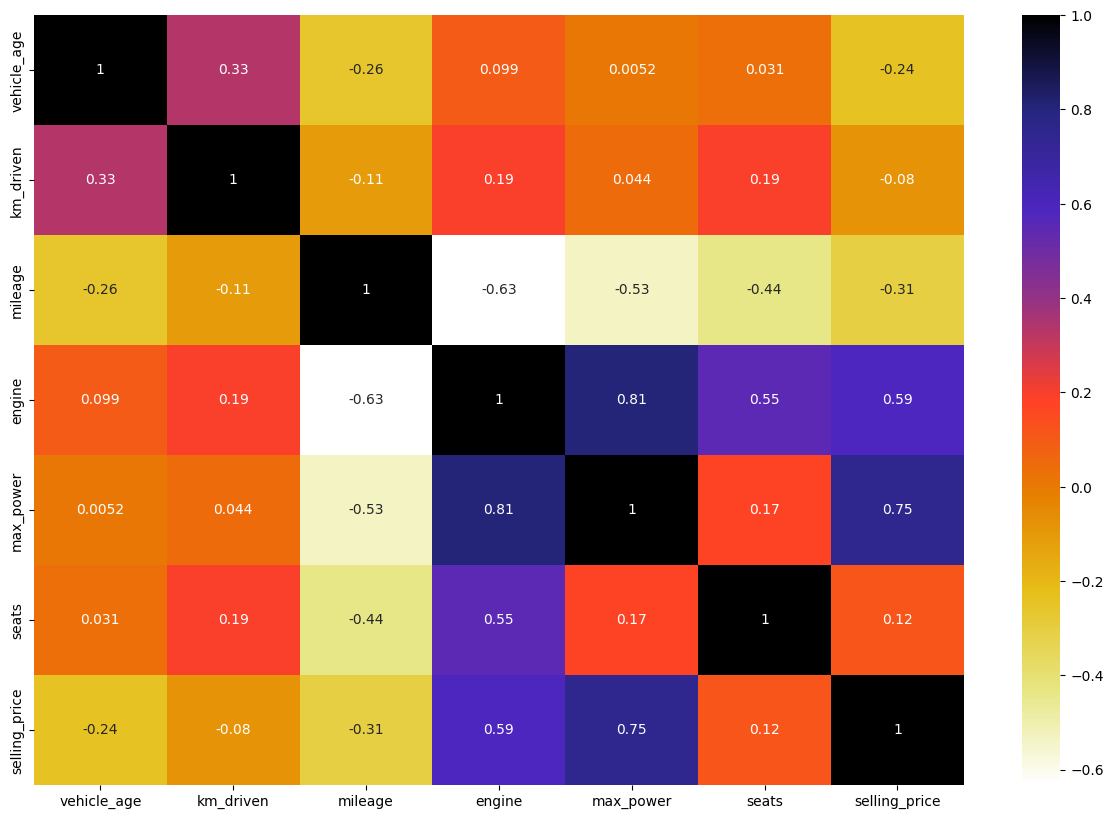

In [32]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numeric_features].corr(), cmap="CMRmap_r",annot=True)
plt.show()

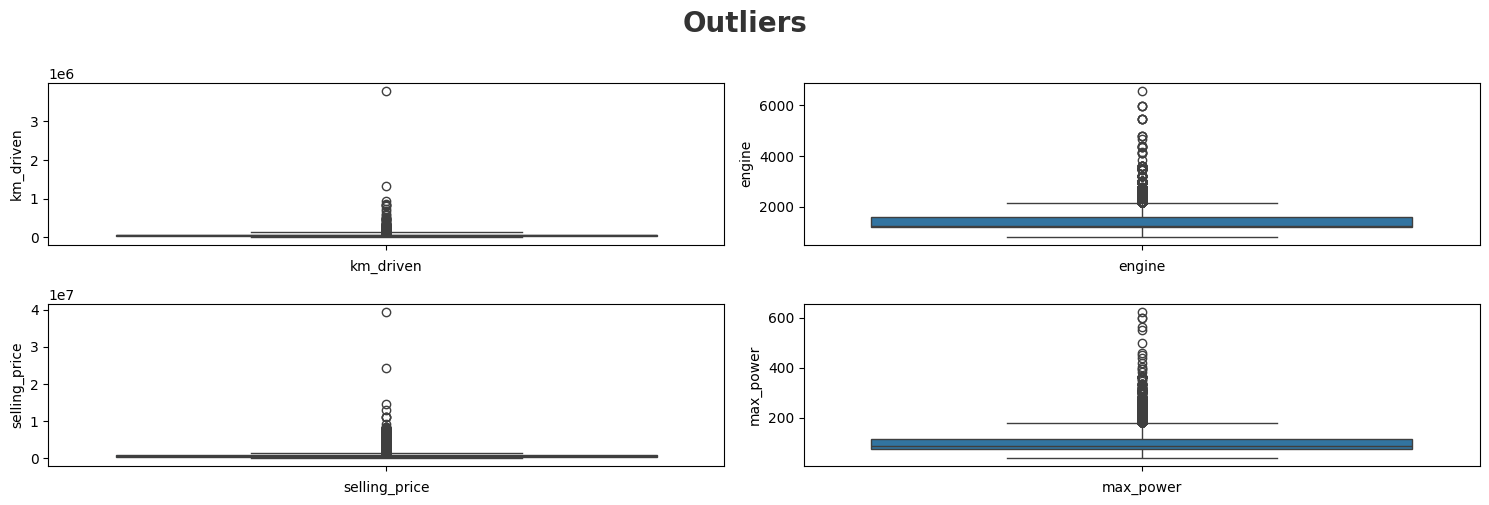

In [33]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()

In [34]:
df.brand

0             Maruti
1             Maruti
2             Maruti
3             Maruti
4             Maruti
            ...     
15406        Bentley
15407    Rolls-Royce
15408        Bentley
15409        Ferrari
15410        Bentley
Name: brand, Length: 15411, dtype: object

In [35]:
df[df['brand'] == 'Maruti']

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.40,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.40,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.40,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.40,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.40,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529,Maruti Ertiga,Maruti,Ertiga,1,4500,Individual,Petrol,Manual,19.01,1462,103.26,7,830000
10530,Maruti Ertiga,Maruti,Ertiga,1,5000,Individual,Petrol,Automatic,17.99,1462,103.26,7,900000
10531,Maruti Vitara,Maruti,Vitara,1,1000,Dealer,Petrol,Manual,17.03,1462,103.26,5,800000
10532,Maruti Vitara,Maruti,Vitara,1,12000,Dealer,Petrol,Automatic,18.76,1462,103.26,5,1225000


In [36]:
df[df['brand'] == 'Maruti']['selling_price'].mean()

487089.3179086539

In [37]:
#most costlier brand

list(df.groupby('brand'))

[('Audi',
        car_name brand model  vehicle_age  km_driven seller_type fuel_type  \
  12962  Audi A4  Audi    A4           11      67000      Dealer    Petrol   
  12963  Audi A4  Audi    A4           11      70000      Dealer    Petrol   
  12964  Audi A4  Audi    A4           10      68000      Dealer    Petrol   
  12965  Audi A4  Audi    A4            9     120000  Individual    Petrol   
  13118  Audi A4  Audi    A4            9      85250      Dealer    Diesel   
  ...        ...   ...   ...          ...        ...         ...       ...   
  15176  Audi A8  Audi    A8            9      45000  Individual    Diesel   
  15177  Audi A8  Audi    A8            6      55000      Dealer    Diesel   
  15371  Audi Q7  Audi    Q7           10      65000      Dealer    Diesel   
  15372  Audi Q7  Audi    Q7           11     155000  Individual    Diesel   
  15376  Audi A8  Audi    A8           11      30000      Dealer    Petrol   
  
        transmission_type  mileage  engine  max_pow

In [38]:
#most costly

df[df['selling_price']==(df.groupby('brand').selling_price.max()).max()].brand

15409    Ferrari
Name: brand, dtype: object

In [39]:
# Top 10 most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
top_10_expensive_cars=max_brand_price.sort_values(ascending=False).head(10)
top_10_expensive_cars


brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

In [40]:
df.mileage.mean()

19.70115112581922

In [41]:
df.mileage.min()

4.0

In [42]:
df.mileage.max()

33.54

most sold by brand

In [43]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

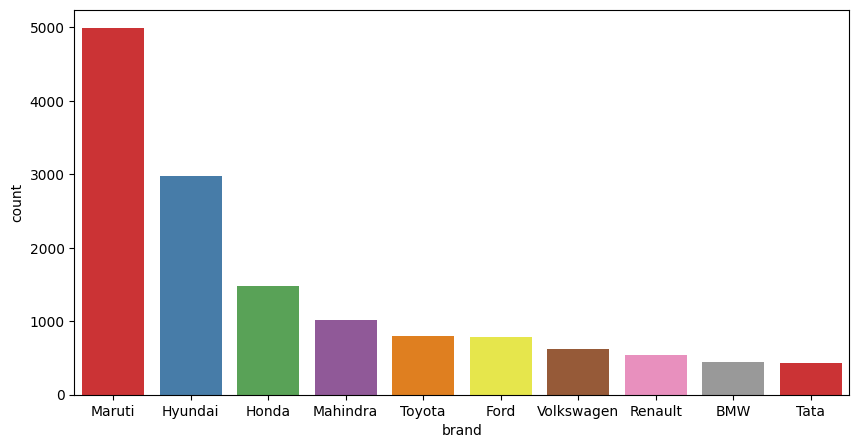

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x = "brand", data = df, palette="Set1",order=df["brand"].value_counts().head(10).index)

In [45]:
# average mean of maruti brand

maruti = df[df['brand'] == "Maruti"]
maruti["selling_price"].mean()

487089.3179086539

<Axes: xlabel='brand', ylabel='selling_price'>

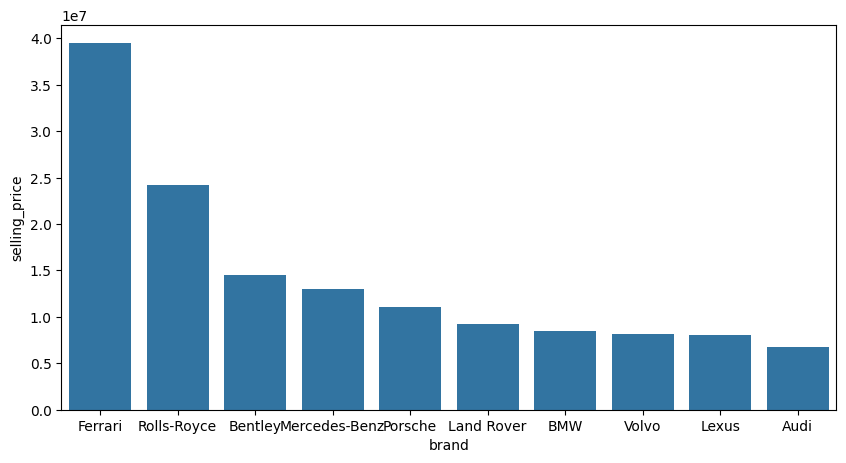

In [46]:
plt.figure(figsize=(10,5))
top_10 = top_10_expensive_cars.to_frame()
# print(top_10)
sns.barplot(x = top_10.index, y = top_10['selling_price'])


In [47]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


In [48]:
mileage.index

Index(['Maruti', 'Renault', 'Datsun', 'Lexus', 'Ford', 'Honda', 'Maserati',
       'Tata', 'Hyundai', 'Volkswagen', 'Mini', 'Skoda', 'BMW', 'Kia',
       'Force'],
      dtype='object', name='brand')

top 10 costlier car in data set

In [49]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


([0],
 [Text(0, 0, '<built-in method index of str object at 0x000002B9716D3490>')])

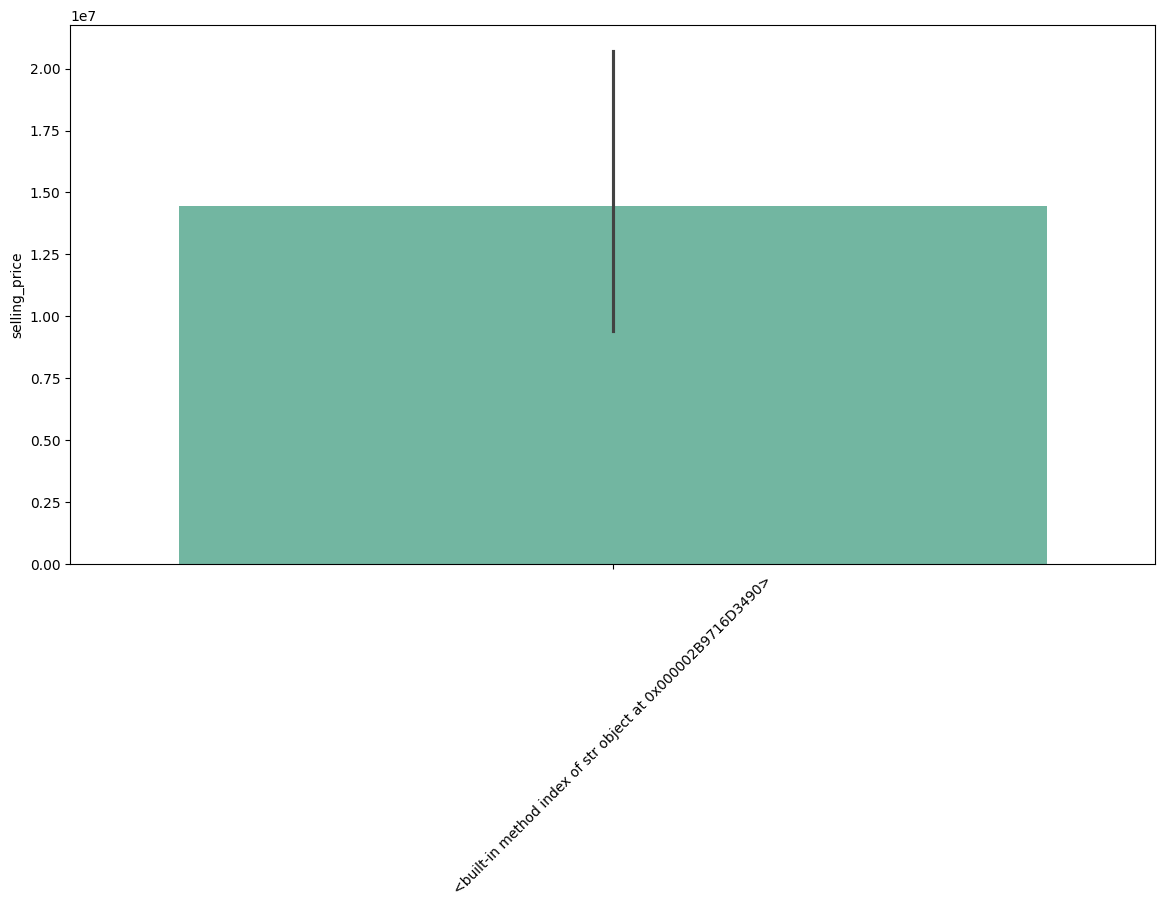

In [50]:
plt.figure(figsize=(14,7))

sns.barplot(x = car_name.index, y = car['selling_price'], palette="Set2")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hyundai i20'),
  Text(1, 0, 'Maruti Swift Dzire'),
  Text(2, 0, 'Maruti Swift'),
  Text(3, 0, 'Maruti Alto'),
  Text(4, 0, 'Honda City'),
  Text(5, 0, 'Maruti Wagon R'),
  Text(6, 0, 'Hyundai Grand'),
  Text(7, 0, 'Toyota Innova'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Hyundai i10')])

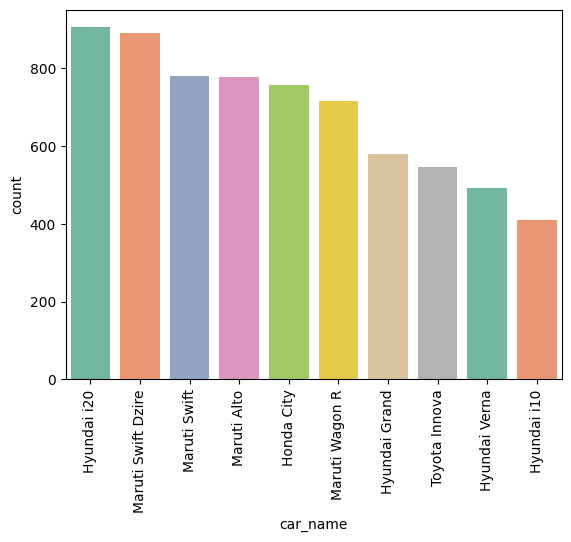

In [51]:
sns.countplot(x="car_name",palette="Set2", data = df, order=df["car_name"].value_counts().head(10).index)
plt.xticks(rotation = 90)

In [52]:
# mean of i20 to find one car price
i20 = df[df["car_name"] == 'Hyundai i20']
selling_price_i20 = i20.selling_price.mean()
print("the average mean price of i20 is", selling_price_i20)
av_share_i20 = df["car_name"].value_counts(normalize=True)*100
print("the average share of hyundai i20 is", round(av_share_i20[0],2), "%")

the average mean price of i20 is 543603.7527593819
the average share of hyundai i20 is 5.88 %


kilometre vs vechile age

<Axes: xlabel='vehicle_age', ylabel='km_driven'>

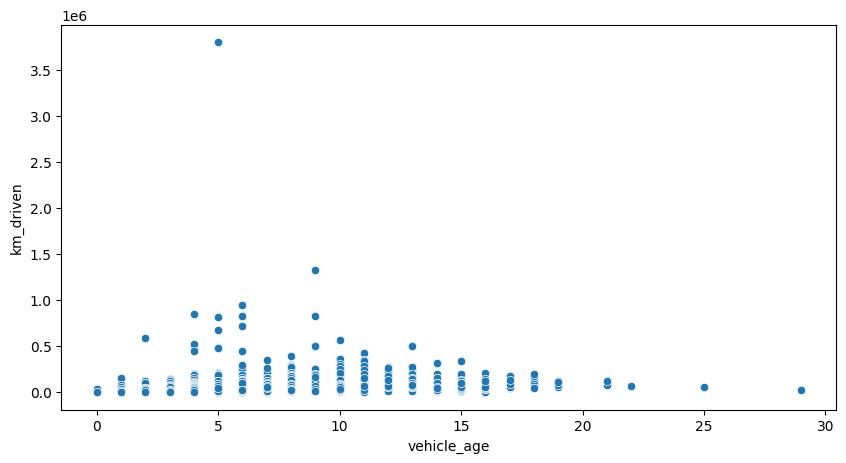

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['vehicle_age'], y=df['km_driven'])

In [54]:
max_km_driven= df.km_driven.max()
index = df[df["km_driven"]==max_km_driven.max()].index
index[0]
#df.drop(index[0], inplace=True)

13314

In [55]:
df[df["km_driven"]==max_km_driven]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
13314,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000


<Axes: xlabel='km_driven', ylabel='vehicle_age'>

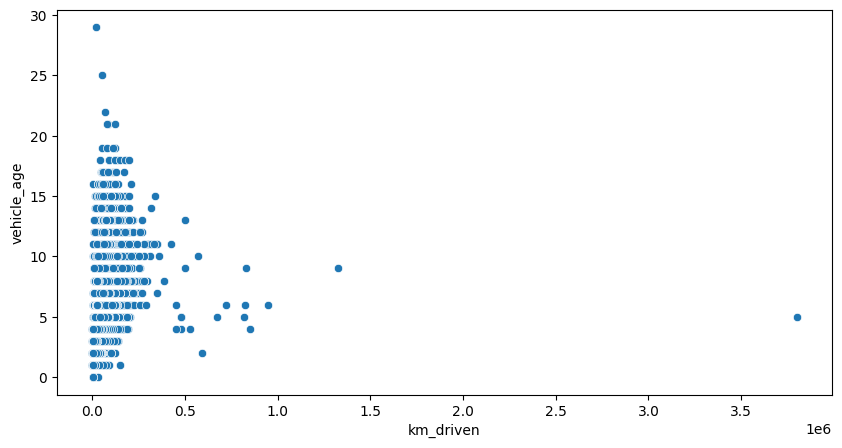

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['km_driven'],y=df['vehicle_age'])

Text(0, 0.5, 'Mileage in kmpl')

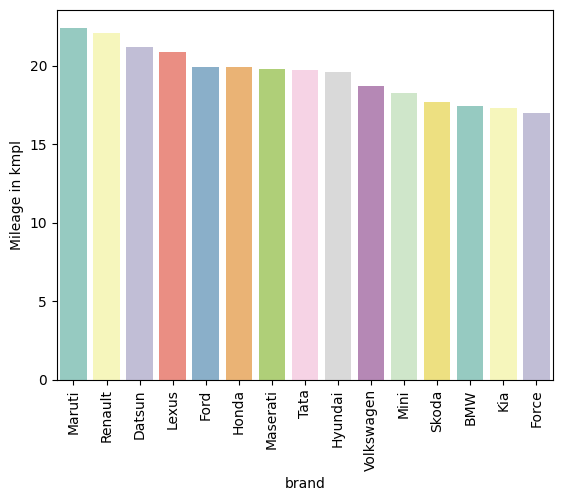

In [57]:
sns.barplot(x=mileage.index,y = mileage.values, palette='Set3')
plt.xticks(rotation= 90)
plt.ylabel('Mileage in kmpl')

In [58]:
# most milage car

mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tata Tiago'),
  Text(1, 0, 'Maruti Ciaz'),
  Text(2, 0, 'Maruti Vitara'),
  Text(3, 0, 'Renault KWID'),
  Text(4, 0, 'Maruti Celerio'),
  Text(5, 0, 'Maruti Dzire VXI'),
  Text(6, 0, 'Maruti Dzire LXI'),
  Text(7, 0, 'Maruti Dzire ZXI'),
  Text(8, 0, 'Ford Aspire'),
  Text(9, 0, 'Maruti Swift')])

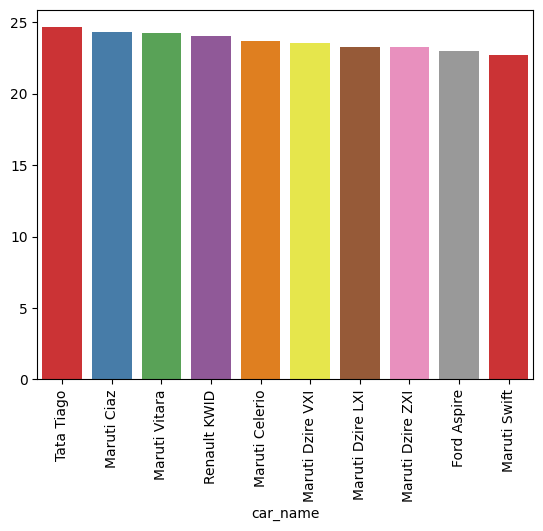

In [59]:
sns.barplot(x=mileage_car.index,y=mileage_car.values, palette='Set1')
plt.xticks(rotation= 90)

km driven vs selling price

(-10000.0, 10000000.0)

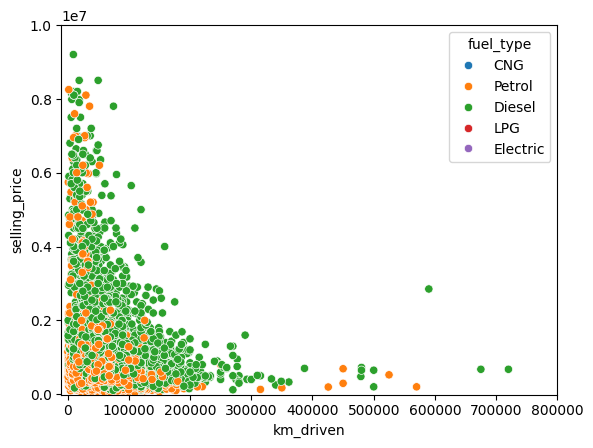

In [60]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'], data=df, hue="fuel_type")
plt.xlim(-10000,800000)
plt.ylim(-10000,10000000)

brand vs selling price

In [61]:
brand_price= df.groupby('brand').selling_price.mean().sort_values(ascending=False)
brand_price.to_frame()

,selling_price
brand,
Ferrari,3.950000e+07
Rolls-Royce,2.420000e+07
Bentley,9.266667e+06
Maserati,6.100000e+06
Porsche,5.161190e+06
Lexus,5.146500e+06
Mercedes-AMG,5.100000e+06
Land Rover,3.823902e+06
Volvo,3.729700e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Maserati'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Lexus'),
  Text(6, 0, 'Mercedes-AMG'),
  Text(7, 0, 'Land Rover'),
  Text(8, 0, 'Volvo'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Audi'),
  Text(14, 0, 'ISUZU'),
  Text(15, 0, 'Jeep'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Toyota'),
  Text(19, 0, 'Isuzu'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Mahindra'),
  Text(22, 0, 'Skoda'),
  Text(23, 0, 'Force'),
  Text(24, 0, 'Tata'),
  Text(25, 0, 'Ford'),
  Text(26, 0, 'Honda'),
  Text(27, 0, 'Hyundai'),
  Text(28, 0, 'Volkswagen'),
  Text(29, 0, 'Maruti'),
  Text(30, 0, 'Renault'),
  Text(31, 0, 'Datsun')])

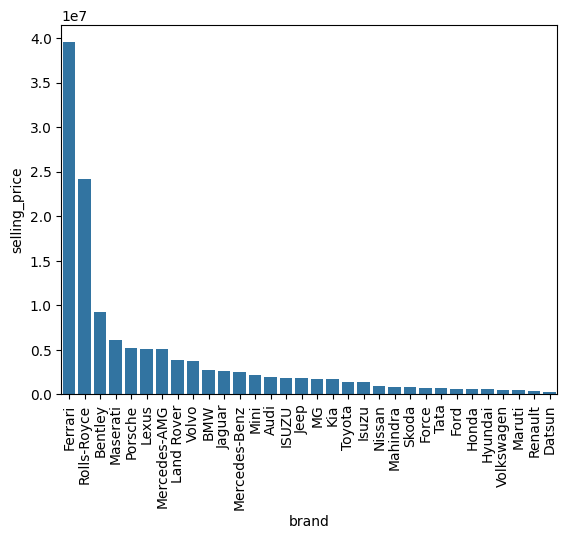

In [62]:
sns.barplot(brand_price)
plt.xticks(rotation=90)

brand vs km km_driven


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Mahindra'),
  Text(5, 0, 'Skoda'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Force'),
  Text(11, 0, 'Toyota'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Kia'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Isuzu'),
  Text(17, 0, 'MG'),
  Text(18, 0, 'Land Rover'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'ISUZU'),
  Text(24, 0, 'Jaguar'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Porsche'),
  Text(27, 0, 'Maserati'),
  Text(28, 0, 'Mercedes-AMG'),
  Text(29, 0, 'Bentley'),
  Text(30, 0, 'Rolls-Royce'),
  Text(31, 0, 'Ferrari')])

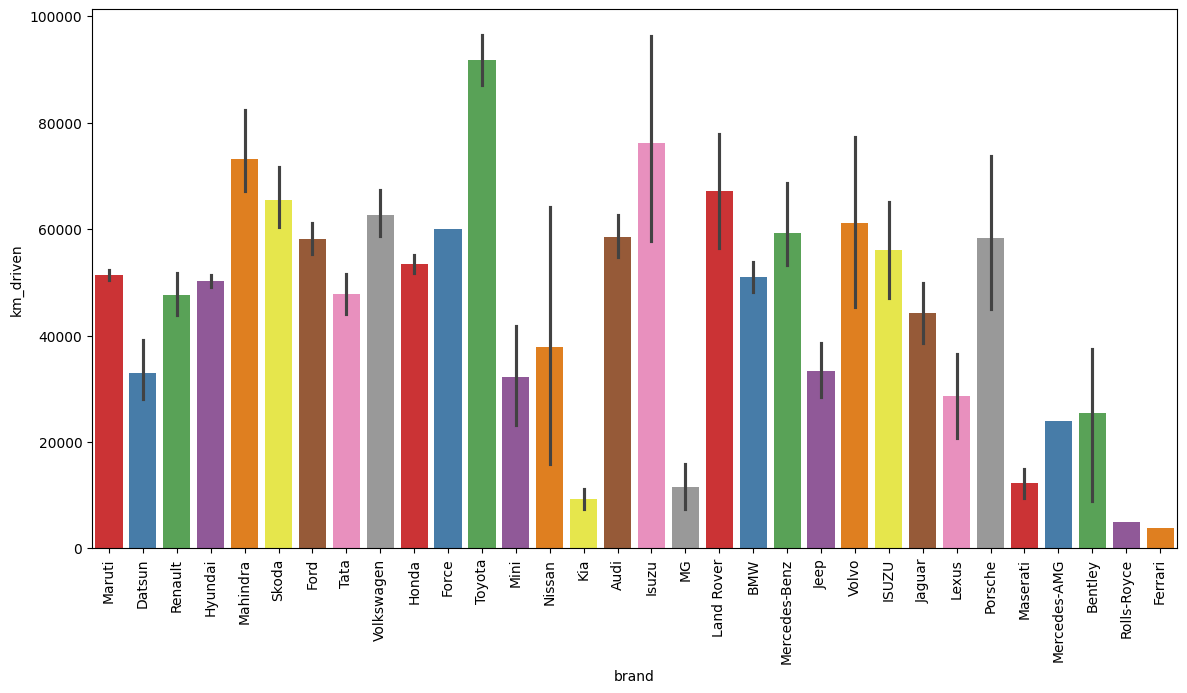

In [63]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['brand'], y= df['km_driven'], palette="Set1")
plt.xticks(rotation=90)



In [64]:
# fuel type vs selling price
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


<Axes: xlabel='fuel_type'>

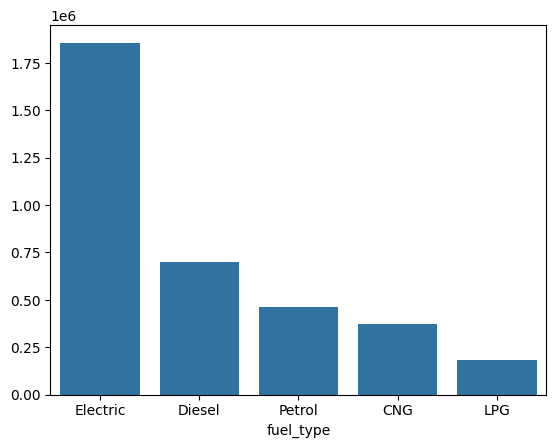

In [65]:
sns.barplot(x = fuel.index, y=fuel.values)

<Axes: xlabel='fuel_type', ylabel='count'>

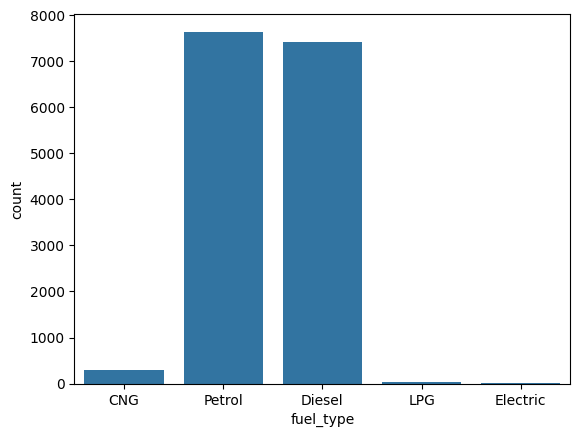

In [66]:
# most sold fuel type
sns.countplot(x=df['fuel_type'])

In [67]:
# Fuel type vs Mileage
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)

fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


<Axes: xlabel='fuel_type', ylabel='mileage'>

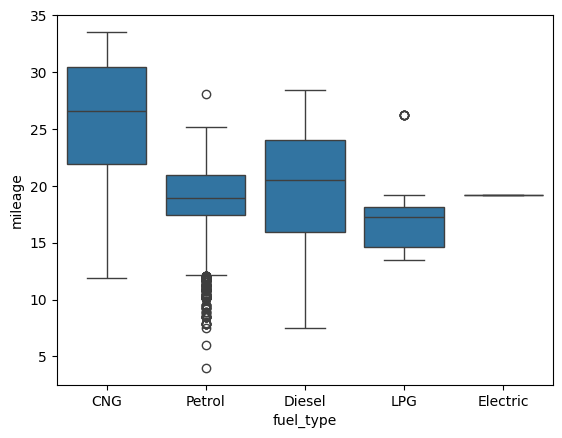

In [68]:
sns.boxplot(x= 'fuel_type', y='mileage', data = df)

(0.0, 10000000.0)

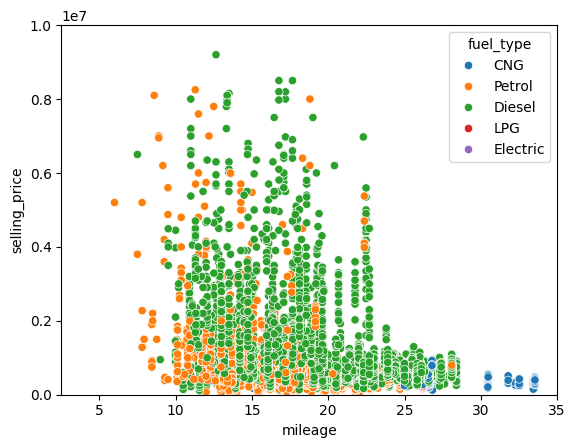

In [69]:
# mileage vs selling price
sns.scatterplot(x= 'mileage', y= 'selling_price', data=df,hue='fuel_type')
plt.ylim(0,10000000)


Mileage distribution

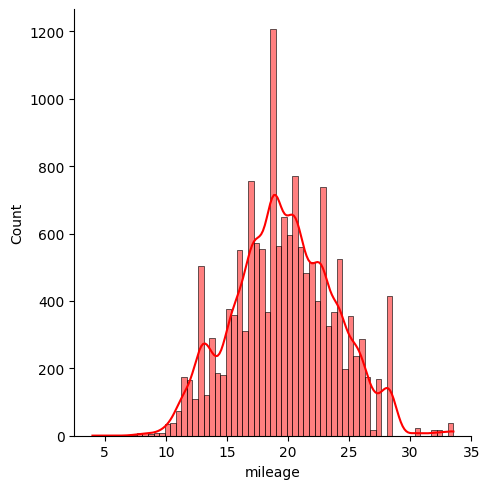

In [70]:
sns.displot(x= 'mileage',data=df, kde= True, color="red")

vechile age vs selling price

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

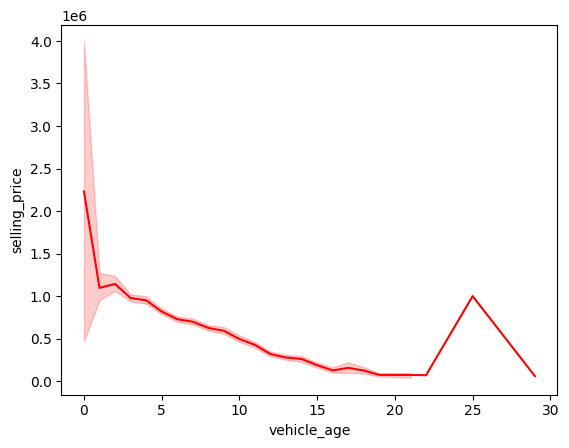

In [71]:
sns.lineplot(x= 'vehicle_age', y= 'selling_price', data=df, color= 'red')

vechile age vs mileage

In [72]:
vehicle_age =  df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


<Axes: xlabel='vehicle_age', ylabel='mileage'>

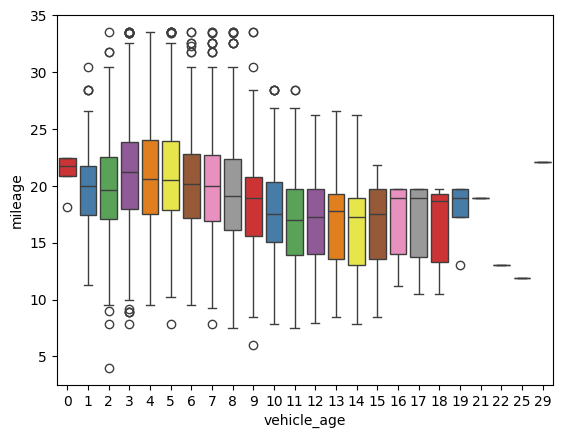

In [73]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1')

Transmission type vs Selling price

<Axes: xlabel='transmission_type', ylabel='selling_price'>

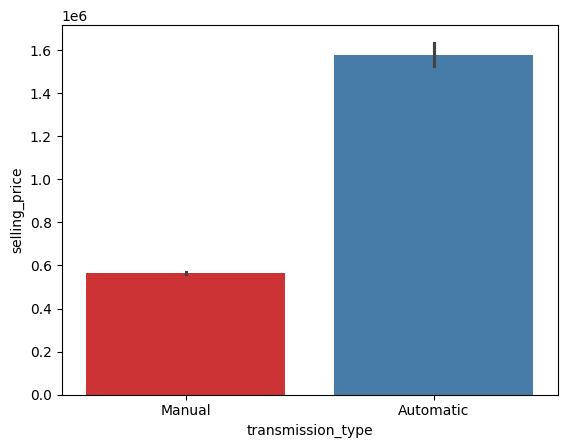

In [74]:
plt.subplots(figure=(14,7))
sns.barplot(x=df['transmission_type'], y=df['selling_price'], data=df, palette="Set1")

Transmission type vs mileage

<Axes: xlabel='transmission_type', ylabel='mileage'>

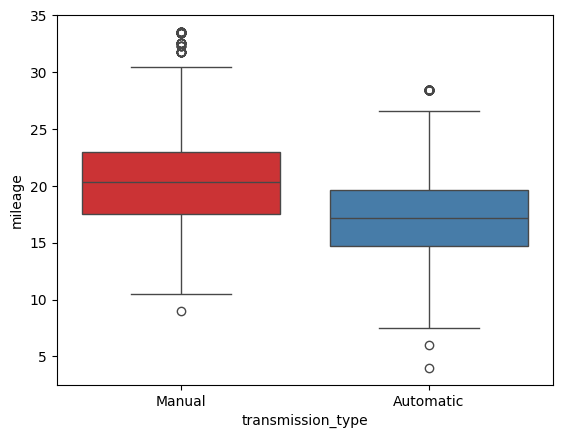

In [75]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['transmission_type'], y=df['mileage'], data=df, palette="Set1")

Transmission type vs count

<Axes: xlabel='transmission_type', ylabel='count'>

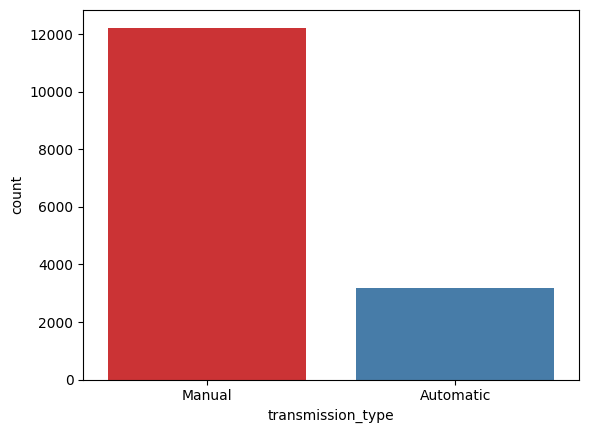

In [76]:
plt.subplots(figure=(14,7))
sns.countplot(x='transmission_type', data=df, palette="Set1")


seller type vs count

<Axes: xlabel='seller_type', ylabel='count'>

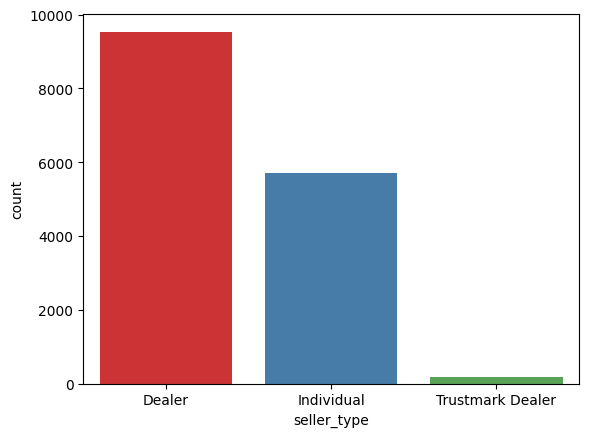

In [77]:
plt.subplots(figure=(14,7))
sns.countplot(x='seller_type', data=df, palette="Set1")


seller type vs selling price


In [78]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


Text(0, 0.5, 'Median Selling Price')

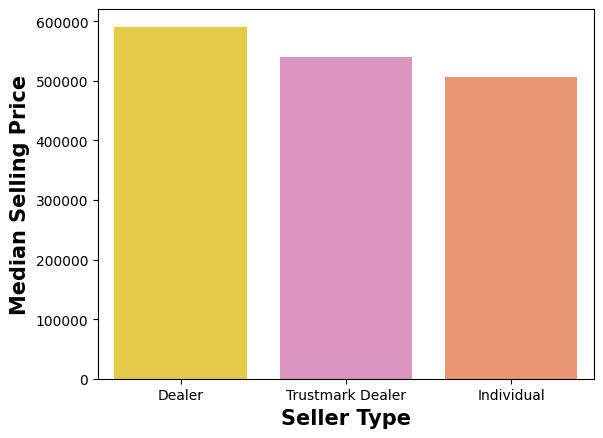

In [79]:
plt.subplots(figure=(14,7))
sns.barplot(x=dealer.index, y =dealer.values,palette="Set2_r")
plt.xlabel("Seller Type", weight="bold", fontsize= 15)
plt.ylabel("Median Selling Price", weight="bold", fontsize= 15)

Final Report

- The datatypes and columns names were right and there was 15411 rows and 13 columns.
- The selling price column is the target to predict i.e. Regression Problem
- There are outliers in the km_driven, engine, selling_price and max power
- Dealers are the highest sellers of the used cars.
- Skewness were found in few columns will be checked after handling the oultiers.
- vehicle age have negative effect on price.
- Manual cars are mostly sold and automatic cars has higher selling average than manual cars.
- Petrol is the most preffered vehicle of the fuel in used cars dataset, followed by diesel and LPG.

feature engineering

# Feature engineering

In [80]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


# removing unnecessary columns

In [81]:
df_model = df.copy()
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [82]:
df_model.drop(labels=['car_name', 'brand', 'model'], axis=1, inplace=True)

In [83]:
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [84]:
df_model.dtypes

vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# converting categorical data to numerical

using One Hot Encoding(get_dummies) to convert categorical data to numerical

In [85]:
df_model = pd.get_dummies(df_model, dtype='float')

In [86]:
df_model


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,235000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,185000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,172000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,125000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,8100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,24200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,5200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,39500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [87]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

# creating Feature Matrix(independent Variable) & Target variable (dependent Variable)

In [88]:
X = df_model.drop('selling_price', axis= 1) # independent variable
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [89]:
y = df_model['selling_price'] # target variable or dependent variable
y

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

# checking important features

In [90]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [91]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [92]:
print("checking for feature importance")
print("-"*50)
print(model.feature_importances_)

checking for feature importance
--------------------------------------------------
[1.71612389e-01 4.91945305e-02 5.95085710e-02 1.39518581e-01
 3.66976507e-01 1.51110234e-02 3.75427776e-03 4.47662227e-03
 2.26769508e-05 3.94727239e-05 8.39792846e-03 1.56063546e-05
 1.91017945e-06 2.11641781e-02 8.32295706e-02 7.69761539e-02]



# visualisation for feature importance

<Axes: >

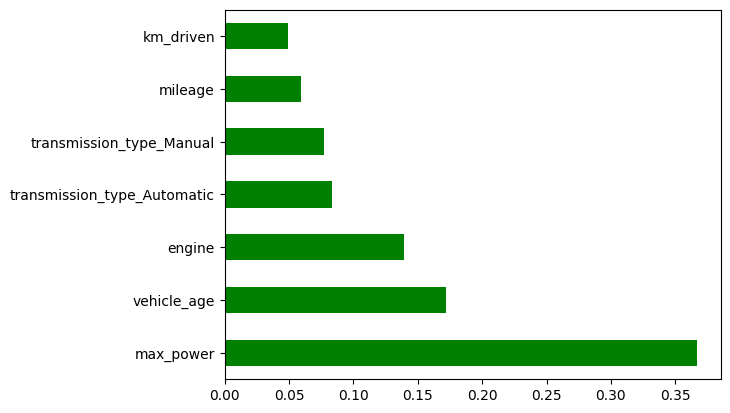

In [93]:
imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.nlargest(7).plot(kind='barh', color='g')

# Model Building and Evaluation

Train - test split

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# importing important libraries for Model Building

In [95]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [96]:
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor,Ridge, Lasso]

mse=[]
rmse = []
evs =[]
r_square_score = []


for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    print(pred)
    mse.append(mean_squared_error(y_true=y_test, y_pred=pred))
    rmse.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred)))
    evs.append(explained_variance_score(y_true=y_test, y_pred=pred))
    r_square_score.append(r2_score(y_true=y_test, y_pred=pred))
               

[3190669.42157042 1195668.19062692  422324.33316257 ...  809636.78698263
  389126.53018346  219553.98156724]
[554878.23441445 555003.27787762 554726.0760656  ... 554762.21499323
 554860.96967878 554221.04824309]
[5499000.  850000.  400000. ...  434000.  345000.  470000.]
[5548116.66666667  963850.83333333  403900.         ...  444658.33333333
  364384.16666667  468940.        ]
[3190674.77016794 1196047.77462955  422298.65731641 ...  809506.89197641
  389234.56533392  219754.81621641]
[3190670.24832693 1195765.27353306  422324.61696728 ...  809625.76593592
  389134.99744467  219571.49452448]


# creating DataFrame for model camparison

In [97]:
ML_model_df = pd.DataFrame({"Model":['Linear Regression', 'Support vector Regression', 'Decision Tree Regressor',\
                                      'Random Forest Regressor', 'Ridge', 'Lasso'],
                                      'Mean Squarred Error':mse,
                                      'Root mean squared error': rmse,
                                      "Explained variance Error": evs,
                                      "R-Squared Score(Accuracy)": r_square_score})

ML_model_df.set_index("Model", inplace=True)
ML_model_df

,Mean Squarred Error,Root mean squared error,Explained variance Error,R-Squared Score(Accuracy)
Model,,,,
Linear Regression,2.336877e+11,483412.605461,0.646853,0.646587
Support vector Regression,7.111150e+11,843276.329657,0.000095,-0.075440
Decision Tree Regressor,8.093199e+10,284485.491128,0.877606,0.877604
Random Forest Regressor,4.549903e+10,213305.025165,0.931262,0.931190
Ridge,2.336879e+11,483412.804695,0.646853,0.646587
Lasso,2.336876e+11,483412.492052,0.646853,0.646587


# result of model training
- RandomForest is giving best accuracy score of 92%.
- RandomForest>DecisionTree>LinearRegression>Ridge>Lasso>SVR

# Generating Pickle file - Saving Trained Model

In [98]:
import pickle

saved_models=[]

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"

    with open(model_filename, "wb") as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [99]:
val=[11,43000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]


In [100]:
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
    data = pickle.load(f)

In [101]:
data

RandomForestRegressor()

In [102]:
data.predict([val])

array([165415.])

In [103]:
val =[2,37095,24.30,1248,88.50,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]
data.predict([val])

array([901750.])

In [104]:
data.score(X_test, y_test)

0.9286167096146176

In [105]:
data.score(X_train, y_train)

0.9794495360582465

- As, my model is performing well in training as well as testing. Now, we will save it for future use.

In [106]:
power_bi_data = pd.read_csv("./data/cars_dataset.csv")

In [107]:
power_bi_data

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [108]:
power_bi_data["Unnamed: 0"] = range(1, len(power_bi_data)+1 )

In [109]:
power_bi_data

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,15407,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,15408,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,15409,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,15410,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [110]:
power_bi_data.rename(columns={"Unnamed: 0" : "car_id"}, inplace=True)

In [111]:
# Separate the dataset into three tables
car_info = power_bi_data[["car_id",'car_name', 'brand', 'model', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']]
car_usage = power_bi_data[['car_id', 'vehicle_age', 'km_driven', 'seller_type']]
car_selling_price = power_bi_data[['car_id', 'selling_price']]

# Save each table to separate CSV files
car_info.to_csv('car_info.csv', index=False)
car_usage.to_csv('car_usage.csv', index=False)
car_selling_price.to_csv('car_selling_price.csv', index=False)